In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import rioxarray as rx
from tqdm import tqdm
import seaborn as sns 
import pandas as pd
import xarray as xr
from tqdm import trange, tqdm, tqdm_notebook
from shapely.geometry import Polygon
import cartopy

In [27]:
import warnings
warnings.filterwarnings("ignore")

### Generating figure 1

In [38]:
Treecover = xr.open_mfdataset('/home/chandra/data/MOD44B_Treecover/250m res/Max_Resol_0.25/Treecover_upscaled_MOD44B_v6_*_lonlatbox.nc').sel(time = slice('2001','2012'))

In [39]:
S_r = xr.open_mfdataset('/home/chandra/data/Max_RZSC_annual_Chirps_Ensemble(BESS+PML+FLUXCOM)/Simulation7 (Sensitivity dataset)/Ensemble/Max_Rootzone_20yearsreturn_Ensemble_(BESS+PML+FLUXCOM)_Chirps_0.25res_2001-2012_mle(skextremes).nc').mle_gumbel[0]

In [40]:
from matplotlib.colors import LinearSegmentedColormap

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

pallete = ['#993404','#d95f0e','#fe9929','#fec44f','#fee391','#ffffd4','#ffffcc','#d9f0a3','#addd8e','#78c679','#41ab5d','#238443','#005a32']
n_bins = [10, 50, 100]
cmap_name = 'my_list'
#fig, axs = plt.subplots(2, 2, figsize=(6, 9))
#fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

#Custom color for maps
"""for n_bin, ax in zip(n_bins, axs.ravel()):
    cm = LinearSegmentedColormap.from_list(cmap_name, pallete, N=n_bin)
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)
"""

'for n_bin, ax in zip(n_bins, axs.ravel()):\n    cm = LinearSegmentedColormap.from_list(cmap_name, pallete, N=n_bin)\n    im = ax.imshow(Z, interpolation=\'nearest\', origin=\'lower\', cmap=cm)\n    ax.set_title("N bins: %s" % n_bin)\n    fig.colorbar(im, ax=ax)\n'

In [41]:
Treecover = Treecover.Treecover.mean(axis = 0)

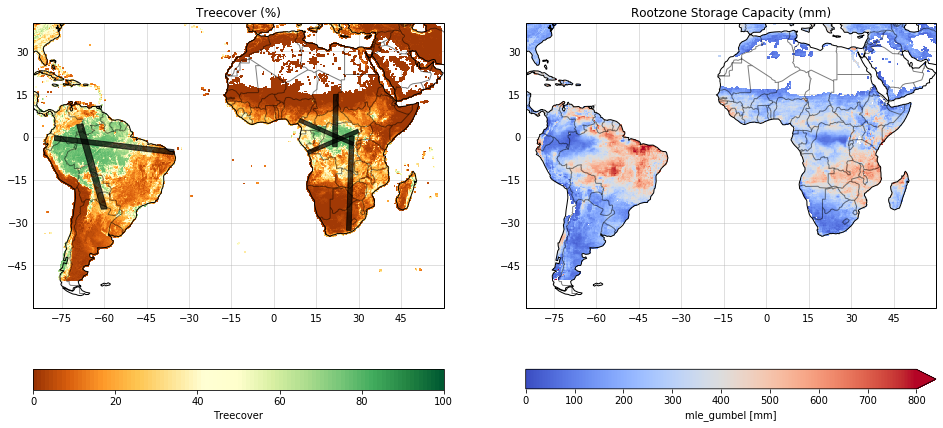

In [42]:
fig = plt.figure(figsize=(25, 7.5))
ax = [plt.subplot(131,projection=ccrs.PlateCarree(), aspect='auto'), plt.subplot(132,projection=ccrs.PlateCarree(), aspect='auto')]
TC = Treecover.where(Treecover.values > 0.1).plot(vmin = 0, vmax = 100, cmap = cm, ax = ax[0], transform=ccrs.PlateCarree(), cbar_kwargs=dict(orientation='horizontal'))
RZ = S_r.where(S_r.values > 0.1).plot(ax = ax[1], transform=ccrs.PlateCarree(), vmin = 0, vmax = 800, cmap = 'coolwarm', cbar_kwargs=dict(orientation='horizontal'))
g0 = ax[0].gridlines(draw_labels=True, alpha =0.5, zorder = -1)
g1 = ax[1].gridlines(draw_labels=True, alpha =0.5, zorder = -1)

ax[0].set_title('Treecover 2012 (%)')
ax[1].set_title('Rootzone Storage Capacity 2001-2012(mm)')
for i in range(2):
    ax[i].coastlines()
    ax[i].add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

#ax[0].set_extent([20,-50,30,125])
g0.xlabels_top = False
g0.ylabels_right = False
g1.xlabels_top = False
g1.ylabels_right = False

ax[1].set_title('Rootzone Storage Capacity (mm)');
ax[0].set_title('Treecover (%)');
x = [-77.5, -35.53471347676384, -35.27104160176384, -77.5]        
y = [-1.2500950457702227, -6.21052129709212, -4.497521499969107, 0.41972388143469946]
ax[0].fill(x, y, c='black', alpha = 0.7,  zorder = 9)
#ax[1].plot([x[0],x[1]],[y[0],y[1]], transform=ccrs.Geodetic(), color = 'b', linewidth  = 2)
x= [-61, -58.94243405948794, -67.44360593448794, -69.69829343448794]
y = [-25.33574390357598, -25.25628091854183, 4.588358690038858, 4.3251667771037083]
ax[0].fill(x, y, c='black', alpha = 0.7,  zorder = 9)
#ax[1].plot([x[0],x[1]],[y[0],y[2]], transform=ccrs.Geodetic(), color = 'b', linewidth  = 2)



x = [8.834936327700573, 27.90720195270057, 28.25876445270057, 9.450170702700573]        
y = [5.21556099844131, -3.0484143188460475, -1.9336534529331602, 6.4022241987976685]
ax[0].fill(x, y, c='black', alpha = 0.7)
x= [11.998998827700573, 12.438451952700573, 30.01657695270057, 29.66501445270057]
y = [-4.828685101447719, -6.016410639559621, 1.4449573404359325, 2.7231566959891853]
ax[0].fill(x, y, c='black', alpha = 0.7)
x= [26.73142070270057, 25.67673320270057, 27.29196757770057, 28.34665507770057]
y = [0.2632440793744436, -32.753139295483777, -32.838494415868405, 0.2632440793744436]
ax[0].fill(x, y, c='black', alpha = 0.7)
x= [22.37009257770057, 22.80954570270057, 21.10642070270057, 20.75485820270057]
y = [-3.382249861355598, 14.93532802669767, 14.861931638540655, -3.3383801066004013]
ax[0].fill(x, y, c='black', alpha = 0.7)

#ax[0].text(6.5,-7,'Transect 1', fontsize = 14, color = 'b', rotation = 90)
#ax[0].text(21,10,'Transect 3', fontsize = 14, color = 'b', rotation = 0)
#ax[0].text(25,-12,'Transect 2', fontsize = 14, color = 'b', rotation = 0)
ax[0].set_xlim(-85,60)
ax[0].set_ylim(-60, 40)
ax[1].set_xlim(-85,60)
ax[1].set_ylim(-60, 40)

import matplotlib.ticker as mticker
g1.xlocator = mticker.FixedLocator([-90 ,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
g1.ylocator = mticker.FixedLocator([-60, -45, -30, -15, 0, 15, 30, 45, 60])
g0.xlocator = mticker.FixedLocator([-90 ,-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75, 90])
g0.ylocator = mticker.FixedLocator([-60, -45, -30, -15, 0, 15, 30, 45, 60])

plt.show()

In [132]:
## Defining function to compute for each continent (based on lat and long values)
def ROIs(lat_top, lat_bottom, lon_min, lon_max):
    import xarray as xr
    import matplotlib.pyplot as plt
    global Landcover, Cropland, Pasture, Treecover
    global S_r, S_r_CI_lower, S_r_CI_upper
    global Ground_WT, eco_2017
    import numpy as np
    import pandas as pd
    
    #Rootzone storage capacity
    S_r = xr.open_dataset('/Max_Rootzone_20yearsreturn_Ensemble_(BESS+PML+FLUXCOM)_Chirps_0.25res_2001-2012_mle(skextremes).nc').mle_gumbel[0]
    S_r_CI_lower = xr.open_dataset('/Max_Rootzone_20yearsreturn_Ensemble_(BESS+PML+FLUXCOM)_Chirps_0.25res_2001-2012_mle(skextremes)_CI_0.05_lower.nc').mle_gumbel_CI_lower[0]
    S_r_CI_upper = xr.open_dataset('/Max_Rootzone_20yearsreturn_Ensemble_(BESS+PML+FLUXCOM)_Chirps_0.25res_2001-2012_mle(skextremes)_CI_0.05_upper.nc').mle_gumbel_CI_upper[0]
    
    '''
    Link to all the datasets below are are provided in the 'Data Availability' section of the manuscript
    '''
    #IGBP landcover classes
    Landcover = xr.open_dataset('MCD12Q1_IGBP_Land_Classification_025res_2001_lonlatbox.nc').Band1.sel(lat = slice(-50,50))
    Landcover = Landcover.where((Landcover == 1) | (Landcover == 2) | (Landcover == 3) | (Landcover == 4) | (Landcover == 5) | (Landcover == 6) | 
               (Landcover == 7) | (Landcover == 8) | (Landcover == 9) | (Landcover == 10) | (Landcover == 12) | (Landcover == 14) | (Landcover == 16))
    
    #Ground water table depth
    Ground_WT = xr.open_dataset('Global_wtd_lowres_lontatbox_0.25res.nc').WTD[0].sel(lat = slice(-50,50))
    
    #MODIS continuous treecover
    Treecover = xr.open_mfdataset('Treecover_MOD44B_v6_*_lonlatbox.nc').Treecover;    
    
    #Foley et al (2005) cropland and pasture
    Cropland = xr.open_dataset('Cropland_ramakutty_2000_0.25res_lonlatbox.nc').Treecover.sel(lat = slice(-50,50))[0]
    Pasture = xr.open_dataset('Pasture_ramakutty_2000_0.25res_lonlatbox.nc').Treecover.sel(lat = slice(-50,50))[0]
    
    #Ecoregions
    eco_2017 = xr.open_dataset('Ecoregions2017_lonlatbox.nc').Ecoregions2017[::-1,:].sel(lat = slice(-50,50))
    
    ## Select from defined lon and lat
    eco_2017 = eco_2017.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))
    Landcover = Landcover.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))
    Cropland = Cropland.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max-0.01))
    Pasture = Pasture.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max-0.01))
    S_r = S_r.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))
    S_r_CI_lower = S_r_CI_lower.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))
    S_r_CI_upper = S_r_CI_upper.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))
    Treecover = Treecover.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))    
    Ground_WT = Ground_WT.sel(lat = slice(lat_bottom,lat_top), lon = slice(lon_min,lon_max))    
    
    # Cropland and pasture threshold (30%)
    Threshold = 0.3
    '''
    Change threshold to 1 when running for transect #5 and #6; for the rest the threshold remains 0.3 (as 30% cropland & pasture filtering)
    '''
    Landcover = Landcover.where((Cropland.values < Threshold) & (Pasture.values < Threshold))
    S_r =S_r.where(Landcover.values>0)
    S_r_CI_lower =S_r_CI_lower.where(Landcover.values>0)
    S_r_CI_upper =S_r_CI_upper.where(Landcover.values>0)
    Treecover = Treecover.where(Landcover.values>0)   
    

In [44]:
# Calculating for South America
ROIs(15,-50,280,325)

In [45]:
#Rooting depth
Root_D = xr.open_dataset('/home/chandra/backup/Root Depth/maxroot_South_America_CF.nc').root_depth

In [46]:
S_r = S_r.rename({'lon': 'x','lat': 'y'})
S_r = S_r.assign_coords(x=(((S_r.x - 180) % 360) - 179.875))

In [47]:
S_r_CI_lower = S_r_CI_lower.rename({'lon': 'x','lat': 'y'})
S_r_CI_lower = S_r_CI_lower.assign_coords(x=(((S_r_CI_lower.x - 180) % 360) - 179.875))

S_r_CI_upper = S_r_CI_upper.rename({'lon': 'x','lat': 'y'})
S_r_CI_upper = S_r_CI_upper.assign_coords(x=(((S_r_CI_upper.x - 180) % 360) - 179.875))

In [48]:
Treecover = Treecover.rename({'lon': 'x','lat': 'y'})
Treecover = Treecover.assign_coords(x=(((Treecover.x - 180) % 360) - 179.875))

In [49]:
Ground_WT = Ground_WT.rename({'lon': 'x','lat': 'y'})
Ground_WT = Ground_WT.assign_coords(x=(((Ground_WT.x - 180) % 360) - 179.875))

In [50]:
eco_2017 = eco_2017.rename({'lon': 'x','lat': 'y'})
eco_2017 = eco_2017.assign_coords(x=(((eco_2017.x - 180) % 360) - 179.875))

In [51]:
import rioxarray as rx

#Transects 1 and 2 respectively
geometries_1 = [
    {
        'type': 'Polygon',
        'coordinates': [[
        [-77.5, -1.2500950457702227],
          [-35.53471347676384, -6.21052129709212],
          [-35.27104160176384, -4.497521499969107],
          [-77.5, 0.41972388143469946]]]
        }
]

geometries_2 = [
    {
        'type': 'Polygon',
        'coordinates': [[
        [-61, -25.33574390357598],
          [-58.94243405948794, -25.25628091854183],
          [-67.44360593448794, 4.588358690038858],
          [-68.69829343448794, 4.3251667771037083]]]
    }
]

S_r = S_r.rio.set_crs("+init=epsg:4326")
S_r_CI_lower = S_r_CI_lower.rio.set_crs("+init=epsg:4326")
S_r_CI_upper = S_r_CI_upper.rio.set_crs("+init=epsg:4326")

Treecover = Treecover.rio.set_crs("+init=epsg:4326")
Ground_WT = Ground_WT.rio.set_crs("+init=epsg:4326")


S_r_geometries_1 = S_r.rio.clip(geometries_1, crs=4326)
S_r_geometries_2 = S_r.rio.clip(geometries_2, crs=4326)
S_r_CI_lower_geometries_1 = S_r_CI_lower.rio.clip(geometries_1, crs=4326)
S_r_CI_lower_geometries_2 = S_r_CI_lower.rio.clip(geometries_2, crs=4326)
S_r_CI_upper_geometries_1 = S_r_CI_upper.rio.clip(geometries_1, crs=4326)
S_r_CI_upper_geometries_2 = S_r_CI_upper.rio.clip(geometries_2, crs=4326)
Treecover_geometries_1 = Treecover.rio.clip(geometries_1, Treecover.rio.crs)
Treecover_geometries_2 = Treecover.rio.clip(geometries_2, Treecover.rio.crs)
Ground_WT_geometries_1 = Ground_WT.rio.clip(geometries_1, crs=4326)
Ground_WT_geometries_2 = Ground_WT.rio.clip(geometries_2, crs=4326)

In [52]:
Root_D = Root_D.rename({'lon': 'x','lat': 'y'})
Root_D = Root_D.rio.set_crs("+init=epsg:4326")
Root_D_geometries_1 = Root_D.rio.clip(geometries_1, crs=4326)
Root_D_geometries_2 = Root_D.rio.clip(geometries_2, crs=4326)

In [53]:
#eco_2017 = eco_2017.rename({'lon': 'x','lat': 'y'})
eco_2017 = eco_2017.assign_coords(x=(((eco_2017.x - 180) % 360) - 179.875))
eco_2017 = eco_2017.rio.set_crs("+init=epsg:4326")
eco_2017_geometries_1 = eco_2017.rio.clip(geometries_1, crs=4326)
eco_2017_geometries_2 = eco_2017.rio.clip(geometries_2, crs=4326)

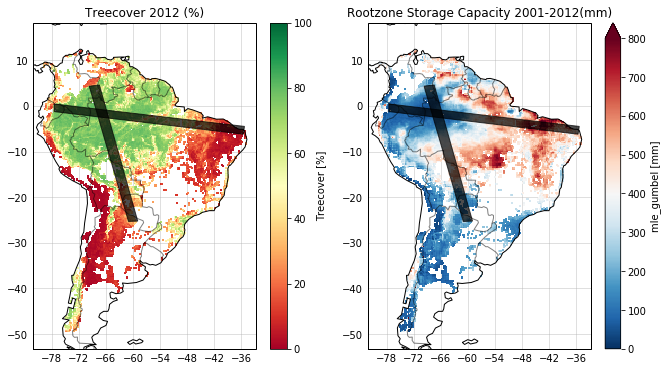

In [54]:
fig = plt.figure(figsize=(17, 6))
ax = [plt.subplot(131,projection=ccrs.PlateCarree(), aspect='auto'), plt.subplot(132,projection=ccrs.PlateCarree(), aspect='auto')]
Treecover[11].where(S_r.values>0).plot(vmin = 0, vmax = 100, cmap = 'RdYlGn', ax = ax[0], transform=ccrs.PlateCarree())
S_r.plot(ax = ax[1], transform=ccrs.PlateCarree(), vmin = 0, vmax = 800, cmap = 'RdBu_r')
g0 = ax[0].gridlines(draw_labels=True, alpha =0.5, zorder = -1)
g1 = ax[1].gridlines(draw_labels=True, alpha =0.5, zorder = -1)

ax[0].set_title('Treecover (%)')
ax[1].set_title('Rootzone Storage Capacity 2001-2012(mm)')
for i in range(2):
    ax[i].coastlines()
    ax[i].add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

g0.xlabels_top = False
g0.ylabels_right = False
g1.xlabels_top = False
g1.ylabels_right = False

x = [-77.5, -35.53471347676384, -35.27104160176384, -77.5]        
y = [-1.2500950457702227, -6.21052129709212, -4.497521499969107, 0.41972388143469946]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)

x= [-61, -58.94243405948794, -67.44360593448794, -69.69829343448794]
y = [-25.33574390357598, -25.25628091854183, 4.588358690038858, 4.3251667771037083]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)
plt.show()

In [55]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

In [56]:
def numpy_interpolater(y):
    def nan_helper(y):
        """Helper to handle indices and logical indices of NaNs.

        Input:
            - y, 1d numpy array with possible NaNs
        Output:
            - nans, logical indices of NaNs
            - index, a function, with signature indices= index(logical_indices),
              to convert logical indices of NaNs to 'equivalent' indices
        Example:
            >>> # linear interpolation of NaNs
            >>> nans, x= nan_helper(y)
            >>> y[nans]= np.interp(x(nans), x(~nans), y[~nans])
        """

        return np.isnan(y), lambda z: z.nonzero()[0]
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    return y

### Generating Figure 2

In [58]:
## Plotting ecoregion legend
color = ['#bdd7e7','#6baed6','#3182bd','#08519c','#cbc9e2','#9e9ac8','#756bb1','#54278f','#b2e2e2','#66c2a4','#2ca25f','#006d2c','#005824','#bdbdbd','#969696',
         '#737373','#525252','#fdbe85','#fd8d3c','#d94701']
from scipy import stats
Ecozone = stats.mode(eco_2017_geometries_1.values, axis = 0)

Ecozone = (Ecozone[0])[0]
Ecozone_unique = [101,167,228,349,355,402,417,448,461,465,575,576,636,722,756,798,831,68,85,207]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

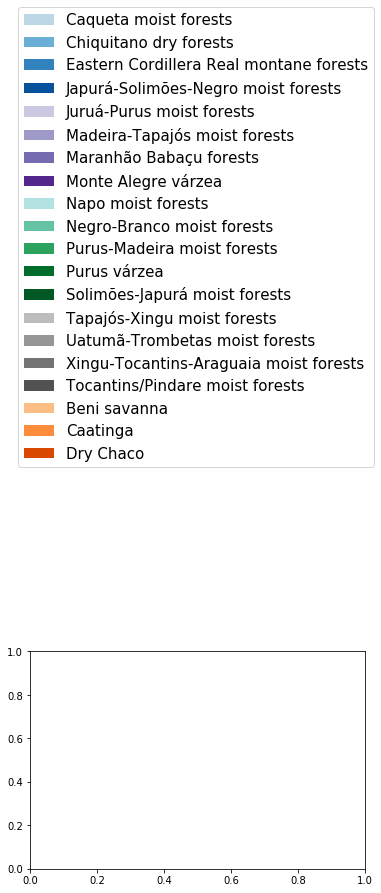

In [61]:
Ecozone_unique_name = ['Caqueta moist forests','Chiquitano dry forests','Eastern Cordillera Real montane forests','Japurá-Solimões-Negro moist forests','Juruá-Purus moist forests','Madeira-Tapajós moist forests',
                       'Maranhão Babaçu forests','Monte Alegre várzea','Napo moist forests','Negro-Branco moist forests','Purus-Madeira moist forests','Purus várzea',
                       'Solimões-Japurá moist forests','Tapajós-Xingu moist forests','Uatumã-Trombetas moist forests','Xingu-Tocantins-Araguaia moist forests',
                       'Tocantins/Pindare moist forests','Beni savanna','Caatinga','Dry Chaco']

import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

recs = []
for i in range(0,len(color)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=color[i]))
fontP = FontProperties()
fontP.set_size('15')
plt.legend(recs,Ecozone_unique_name, ncol = 1,prop=fontP, bbox_to_anchor=(1.05, 4))

In [59]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

<BarContainer object of 168 artists>

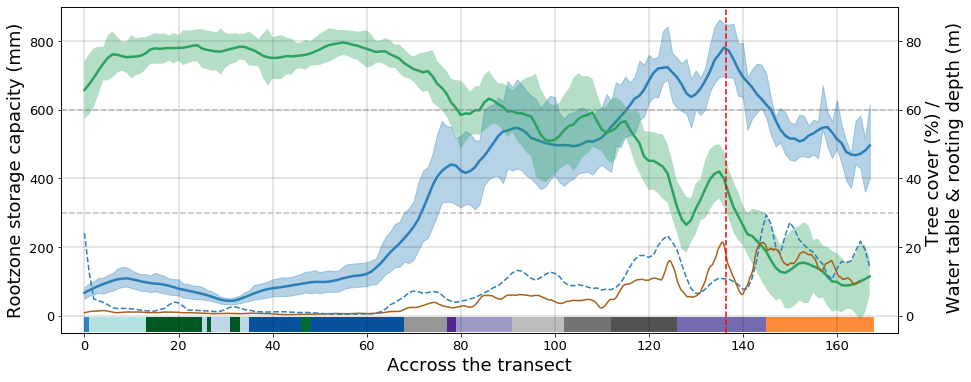

In [60]:
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter("ignore")

fig, ax1 = plt.subplots(figsize = (15,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_1.mean(axis = 0), 7, 2)

Treecover_yhat = savgol_filter(Treecover_geometries_1[0:12].mean(axis = 0).mean(axis = 0), 7, 2) 
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_1.mean(axis = 0), 7, 2) 
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_1.mean(axis = 0), 7, 2)

p1, = ax1.plot(S_r_yhat, linewidth = 2.5, label = 'Rootzone Storage Capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2.5, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_1[0:12].where(Treecover_geometries_1).std(axis = 0).mean(axis = 0))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_1[0:12].where(Treecover_geometries_1).std(axis = 0).mean(axis = 0))*2))
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_1.mean(axis = 0), S_r_CI_upper_geometries_1.mean(axis = 0),
                      color = '#2c7fb8', alpha = 0.35)

q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)

ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax2.set_ylim(-5,90)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

lines = [p1, p2, p3, p4]

ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)

ax2.axvline(x=136.5, linestyle='--', color = 'r')

ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)-1), color=color_sel)


In [63]:
Ecozone = stats.mode(eco_2017_geometries_2.values, axis = 1)
Ecozone = (Ecozone[0])[:,0]
#Ecozone_unique = np.unique(Ecozone)[~np.isnan(np.unique(Ecozone))]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

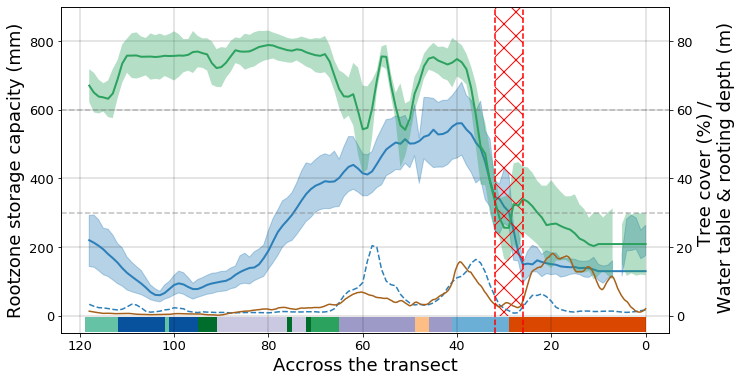

In [64]:
fig, ax1 = plt.subplots(figsize = (10.9,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_2.mean(axis = 1), 7, 2)
Treecover_yhat = savgol_filter(Treecover_geometries_2[0:12].mean(axis = 0).mean(axis = 1), 7, 2) # window size 501, polynomial order 3
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_2.mean(axis = 1), 7, 2) # window size 501, polynomial order 3
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_2.mean(axis = 1), 7, 2)

p1, = ax1.plot(S_r_yhat, linewidth = 2, label = 'Rootzone storage capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_2.mean(axis = 1), S_r_CI_upper_geometries_2.mean(axis = 1),
                      color = '#2c7fb8', alpha = 0.35)
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_2[0:12].where(Treecover_geometries_2).std(axis = 0).mean(axis = 1))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_2[0:12].where(Treecover_geometries_2).std(axis = 0).mean(axis = 1))*2))


q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)

ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

ax2.set_ylim(-5,90)

lines = [p1, p2, p3]

ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)

ax2.axvline(x=26, linestyle='--', color = 'r')
ax2.axvline(x=32, linestyle='--', color = 'r')
plt.fill_between([26,32],[900,900], facecolor="none", hatch="X", edgecolor="r", linewidth=0.0)
ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)-1), color=color_sel)
plt.gca().invert_xaxis()

In [133]:
## For Africa
ROIs(15,-35,0,50) #For whole Africa

In [134]:
Root_D = xr.open_dataset('/home/chandra/backup/Root Depth/maxroot_Africa_CF.nc').root_depth

In [135]:
geometries_1 = [
    {
        'type': 'Polygon',
        'coordinates': 
        [[[8.834936327700573, 5.21556099844131],
          [27.90720195270057, -3.0484143188460475],
          [28.25876445270057, -1.9336534529331602],
          [9.450170702700573, 6.4022241987976685]]]}
]
geometries_2 = [
    {
        'type': 'Polygon',
        'coordinates': 
        [[[11.998998827700573, -4.828685101447719],
          [12.438451952700573, -6.016410639559621],
          [30.01657695270057, 1.4449573404359325],
          [29.66501445270057, 2.7231566959891853]]]}
]
geometries_3 = [
    {
        'type': 'Polygon',
        'coordinates': 
        [[[26.73142070270057, 0.2632440793744436],
          [25.67673320270057, -32.753139295483777],
          [27.29196757770057, -32.838494415868405],
          [28.34665507770057, 0.2632440793744436]]]}
]
geometries_4 = [
    {
        'type': 'Polygon',
        'coordinates': 
        [[[22.37009257770057, -3.382249861355598],
          [22.80954570270057, 14.93532802669767],
          [21.10642070270057, 14.861931638540655],
          [20.75485820270057, -3.3383801066004013]]]}
]

In [136]:
eco_2017 = eco_2017.rename({'lon': 'x','lat': 'y'})
eco_2017 = eco_2017.assign_coords(x=(((eco_2017.x - 180) % 360) - 179.875))
eco_2017 = eco_2017.rio.set_crs("+init=epsg:4326")
eco_2017_geometries_1 = eco_2017.rio.clip(geometries_1, crs=4326)
eco_2017_geometries_2 = eco_2017.rio.clip(geometries_2, crs=4326)

In [137]:
eco_2017_geometries_3 = eco_2017.rio.clip(geometries_3, crs=4326)
eco_2017_geometries_4 = eco_2017.rio.clip(geometries_4, crs=4326)

In [138]:
S_r = S_r.rename({'lon': 'x','lat': 'y'})
S_r = S_r.assign_coords(x=(((S_r.x - 180) % 360) - 179.875))

In [139]:
S_r_CI_lower = S_r_CI_lower.rename({'lon': 'x','lat': 'y'})
S_r_CI_lower = S_r_CI_lower.assign_coords(x=(((S_r_CI_lower.x - 180) % 360) - 179.875))

S_r_CI_upper = S_r_CI_upper.rename({'lon': 'x','lat': 'y'})
S_r_CI_upper = S_r_CI_upper.assign_coords(x=(((S_r_CI_upper.x - 180) % 360) - 179.875))

In [140]:
Treecover = Treecover.rename({'lon': 'x','lat': 'y'})
Treecover = Treecover.assign_coords(x=(((Treecover.x - 180) % 360) - 179.875))

In [141]:
Ground_WT = Ground_WT.rename({'lon': 'x','lat': 'y'})
Ground_WT = Ground_WT.assign_coords(x=(((Ground_WT.x - 180) % 360) - 179.875))

In [142]:
S_r = S_r.rio.set_crs("+init=epsg:4326")
S_r_CI_lower = S_r_CI_lower.rio.set_crs("+init=epsg:4326")
S_r_CI_upper = S_r_CI_upper.rio.set_crs("+init=epsg:4326")

Treecover = Treecover.rio.set_crs("+init=epsg:4326")
Ground_WT = Ground_WT.rio.set_crs("+init=epsg:4326")


S_r_geometries_1 = S_r.rio.clip(geometries_1, crs=4326)
S_r_geometries_2 = S_r.rio.clip(geometries_2, crs=4326)
S_r_geometries_3 = S_r.rio.clip(geometries_3, crs=4326)
S_r_geometries_4 = S_r.rio.clip(geometries_4, crs=4326)

S_r_CI_lower_geometries_1 = S_r_CI_lower.rio.clip(geometries_1, crs=4326)
S_r_CI_lower_geometries_2 = S_r_CI_lower.rio.clip(geometries_2, crs=4326)
S_r_CI_lower_geometries_3 = S_r_CI_lower.rio.clip(geometries_3, crs=4326)
S_r_CI_lower_geometries_4 = S_r_CI_lower.rio.clip(geometries_4, crs=4326)
S_r_CI_upper_geometries_1 = S_r_CI_upper.rio.clip(geometries_1, crs=4326)
S_r_CI_upper_geometries_2 = S_r_CI_upper.rio.clip(geometries_2, crs=4326)
S_r_CI_upper_geometries_3 = S_r_CI_upper.rio.clip(geometries_3, crs=4326)
S_r_CI_upper_geometries_4 = S_r_CI_upper.rio.clip(geometries_4, crs=4326)

Treecover_geometries_1 = Treecover.rio.clip(geometries_1, Treecover.rio.crs)
Treecover_geometries_2 = Treecover.rio.clip(geometries_2, Treecover.rio.crs)
Treecover_geometries_3 = Treecover.rio.clip(geometries_3, Treecover.rio.crs)
Treecover_geometries_4 = Treecover.rio.clip(geometries_4, Treecover.rio.crs)

Ground_WT_geometries_1 = Ground_WT.rio.clip(geometries_1, crs=4326)
Ground_WT_geometries_2 = Ground_WT.rio.clip(geometries_2, crs=4326)
Ground_WT_geometries_3 = Ground_WT.rio.clip(geometries_3, crs=4326)
Ground_WT_geometries_4 = Ground_WT.rio.clip(geometries_4, crs=4326)

In [143]:
Root_D = Root_D.rename({'lon': 'x','lat': 'y'})
Root_D = Root_D.rio.set_crs("+init=epsg:4326")
Root_D_geometries_1 = Root_D.rio.clip(geometries_1, crs=4326)
Root_D_geometries_2 = Root_D.rio.clip(geometries_2, crs=4326)
Root_D_geometries_3 = Root_D.rio.clip(geometries_3, crs=4326)
Root_D_geometries_4 = Root_D.rio.clip(geometries_4, crs=4326)

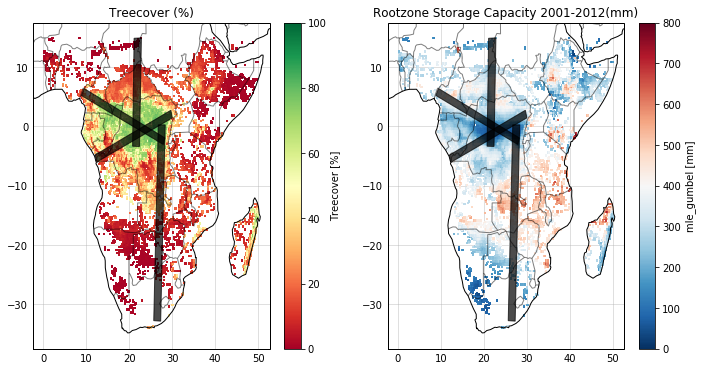

In [144]:
fig = plt.figure(figsize=(18,6))
ax = [plt.subplot(131,projection=ccrs.PlateCarree(), aspect='auto'), plt.subplot(132,projection=ccrs.PlateCarree(), aspect='auto')]
Treecover[11].where(S_r.values>0).plot(vmin = 0, vmax = 100, cmap = 'RdYlGn', ax = ax[0], transform=ccrs.PlateCarree())
S_r.plot(ax = ax[1], transform=ccrs.PlateCarree(), vmin = 0, vmax = 800, cmap = 'RdBu_r')
g0 = ax[0].gridlines(draw_labels=True, alpha =0.5, zorder = -1)
g1 = ax[1].gridlines(draw_labels=True, alpha =0.5, zorder = -1)

ax[0].set_title('Treecover (%)')
ax[1].set_title('Rootzone Storage Capacity 2001-2012(mm)')
for i in range(2):
    ax[i].coastlines()
    ax[i].add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

g0.xlabels_top = False
g0.ylabels_right = False
g1.xlabels_top = False
g1.ylabels_right = False

x = [8.834936327700573, 27.90720195270057, 28.25876445270057, 9.450170702700573]        
y = [5.21556099844131, -3.0484143188460475, -1.9336534529331602, 6.4022241987976685]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)

x= [11.998998827700573, 12.438451952700573, 30.01657695270057, 29.66501445270057]
y = [-4.828685101447719, -6.016410639559621, 1.4449573404359325, 2.7231566959891853]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)
x= [26.73142070270057, 25.67673320270057, 27.29196757770057, 28.34665507770057]
y = [0.2632440793744436, -32.753139295483777, -32.838494415868405, 0.2632440793744436]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)
x= [22.37009257770057, 22.80954570270057, 21.10642070270057, 20.75485820270057]
y = [-3.382249861355598, 14.93532802669767, 14.861931638540655, -3.3383801066004013]
ax[0].fill(x, y, c='black', alpha = 0.7)
ax[1].fill(x, y, c='black', alpha = 0.7)

In [124]:
color = ['#bdc9e1','#74a9cf','#2b8cbe','#045a8d','#99d8c9','#66c2a4','#41ae76','#238b45','#005824','#cccccc','#969696','#636363','#543005','#8c510a',
         '#bf812d','#dfc27d','#f6e8c3', '#fec44f','#fe9929','#ec7014','#cc4c02','#993404','#d4b9da','#c994c7','#df65b0','#e7298a','#ce1256','#91003f']
from scipy import stats
Ecozone = stats.mode(eco_2017_geometries_1.values, axis = 0)

Ecozone = (Ecozone[0])[0]
Ecozone_unique = [14,51,92,136,
                  189,227,497,525,
                  779,507,674,819,
                  152,808,809,811,
                  814,598,219,358,12,133,456,
                  205,310,813,204,
                  408]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

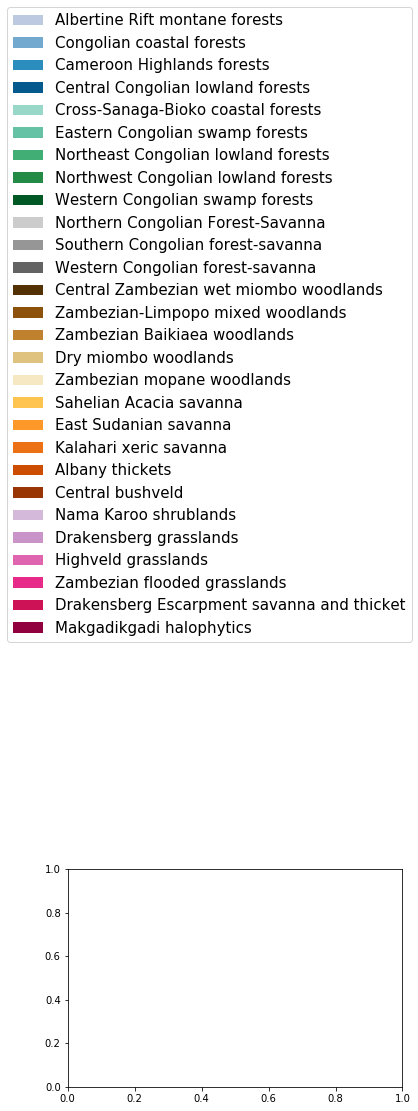

In [125]:
Ecozone_unique_name = ['Albertine Rift montane forests','Congolian coastal forests','Cameroon Highlands forests','Central Congolian lowland forests',
                       'Cross-Sanaga-Bioko coastal forests','Eastern Congolian swamp forests','Northeast Congolian lowland forests','Northwest Congolian lowland forests',
                       'Western Congolian swamp forests','Northern Congolian Forest-Savanna','Southern Congolian forest-savanna','Western Congolian forest-savanna',
                       'Central Zambezian wet miombo woodlands','Zambezian-Limpopo mixed woodlands','Zambezian Baikiaea woodlands','Dry miombo woodlands',
                       'Zambezian mopane woodlands','Sahelian Acacia savanna','East Sudanian savanna','Kalahari xeric savanna','Albany thickets','Central bushveld','Nama Karoo shrublands',
                       'Drakensberg grasslands','Highveld grasslands','Zambezian flooded grasslands','Drakensberg Escarpment savanna and thicket',
                       'Makgadikgadi halophytics']

import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties

recs = []
for i in range(0,len(color)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=color[i]))
fontP = FontProperties()
fontP.set_size('15')
plt.legend(recs,Ecozone_unique_name, ncol = 1,prop=fontP, bbox_to_anchor=(1.05, 5))

##### Transect #3

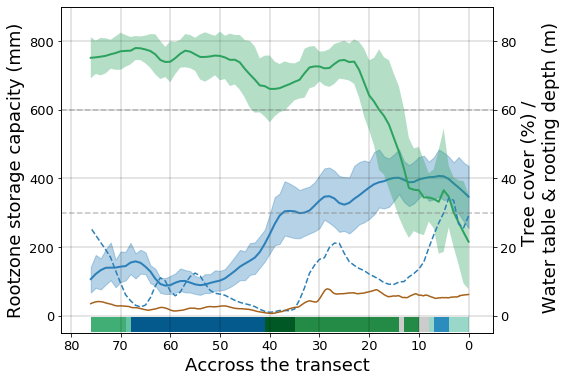

In [81]:
from scipy.signal import savgol_filter
import warnings
warnings.simplefilter("ignore")

fig, ax1 = plt.subplots(figsize = (7.75,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_1.mean(axis = 0), 7, 2)
Treecover_yhat = savgol_filter(Treecover_geometries_1[0:12].mean(axis = 0).mean(axis = 0), 7, 2) 
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_1.mean(axis = 0), 7, 2) 
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_1.mean(axis = 0), 7, 2)

p1, = ax1.plot(S_r_yhat, linewidth = 2, label = 'Rootzone Storage capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_1.mean(axis = 0), S_r_CI_upper_geometries_1.mean(axis = 0),
                      color = '#2c7fb8', alpha = 0.35)
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_1[0:12].where(Treecover_geometries_1).std(axis = 0).mean(axis = 0))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_1[0:12].where(Treecover_geometries_1).std(axis = 0).mean(axis = 0))*2))


q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)

ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

ax2.set_ylim(-5,90)
lines = [p1, p2, p3]

#adds major gridlines
ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)
ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)-1), color=color_sel)
plt.gca().invert_xaxis()

##### Transect #4

In [82]:
Ecozone = stats.mode(eco_2017_geometries_2.values, axis = 0)
Ecozone = (Ecozone[0])[0]
#Ecozone_unique = np.unique(Ecozone)[~np.isnan(np.unique(Ecozone))]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

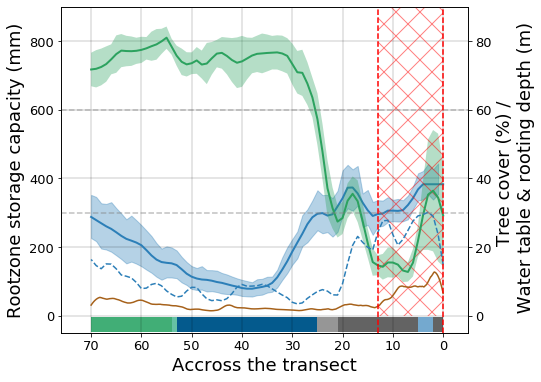

In [83]:
from scipy.signal import savgol_filter

fig, ax1 = plt.subplots(figsize = (7.3,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_2.mean(axis = 0), 7, 2)
Treecover_yhat = savgol_filter(Treecover_geometries_2[0:12].mean(axis = 0).mean(axis = 0), 7, 2) 
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_2.mean(axis = 0), 7, 2) 
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_2.mean(axis = 0), 7, 2)

p1, = ax1.plot(S_r_yhat, linewidth = 2, label = 'Rootzone Storage capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_2.mean(axis = 0), S_r_CI_upper_geometries_2.mean(axis = 0),
                      color = '#2c7fb8', alpha = 0.35)
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_2[0:12].where(Treecover_geometries_2).std(axis = 0).mean(axis = 0))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_2[0:12].where(Treecover_geometries_2).std(axis = 0).mean(axis = 0))*2))


q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)
ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

ax2.set_ylim(-5,90)

lines = [p1, p2, p3]

ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)

plt.fill_between([0,13],[900,900], facecolor="none", hatch="X", edgecolor="r", linewidth=0.0, alpha = 0.5)

ax2.axvline(x=0, linestyle='--', color = 'r')
ax2.axvline(x=13, linestyle='--', color = 'r')
ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)-2), color=color_sel)

plt.gca().invert_xaxis()

###################################################

##### Recall the ROI function without cropland and pastureland filtering
and re-run the code from

till

####################################################

##### Transect #5

In [126]:
Ecozone = stats.mode(eco_2017_geometries_3.values, axis = 1)
Ecozone = (Ecozone[0])[:,0]
#Ecozone_unique = np.unique(Ecozone)[~np.isnan(np.unique(Ecozone))]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

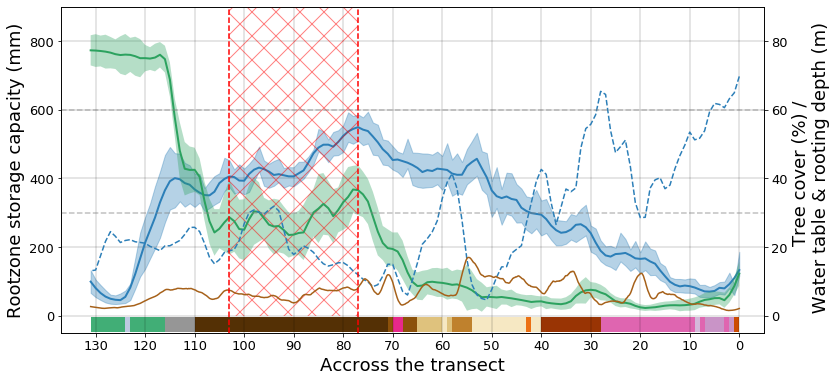

In [127]:
from scipy.signal import savgol_filter

fig, ax1 = plt.subplots(figsize = (12.6,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_3.mean(axis = 1), 7, 2)
Treecover_yhat = savgol_filter(Treecover_geometries_3[0:12].mean(axis = 0).mean(axis = 1), 7, 2) 
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_3.mean(axis = 1), 7, 2) 
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_3.mean(axis = 1), 7, 2)

p1, = ax1.plot(S_r_yhat, linewidth = 2, label = 'Rootzone Storage capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_3.mean(axis = 1), S_r_CI_upper_geometries_3.mean(axis = 1),
                      color = '#2c7fb8', alpha = 0.35)
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_3[0:12].where(Treecover_geometries_3).std(axis = 0).mean(axis = 1))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_3[0:12].where(Treecover_geometries_3).std(axis = 0).mean(axis = 1))*2))


q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)
ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

ax2.set_ylim(-5,90)

lines = [p1, p2, p3]

#adds major gridlines
ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axvline(x=77, linestyle='--', color = 'r')
ax2.axvline(x=103, linestyle='--', color = 'r')
plt.fill_between([77,103],[900,900], facecolor="none", hatch="X", edgecolor="r", linewidth=0.0, alpha = 0.5)


major_ticks = np.arange(0, 150, 10)
ax1.set_xticks(major_ticks)
ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8, which = 'major')
ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)-2), color=color_sel)
plt.gca().invert_xaxis()

##### Transect #6

In [128]:
Ecozone = stats.mode(eco_2017_geometries_4.values, axis = 1)
Ecozone = (Ecozone[0])[:,0]
#Ecozone_unique = np.unique(Ecozone)[~np.isnan(np.unique(Ecozone))]

color_sel = []
for value in Ecozone:
    for i in range(0,np.array(Ecozone_unique).shape[0]):
        if value == Ecozone_unique[i]:
            color_sel.append(color[i])
        else:
            continue

<BarContainer object of 73 artists>

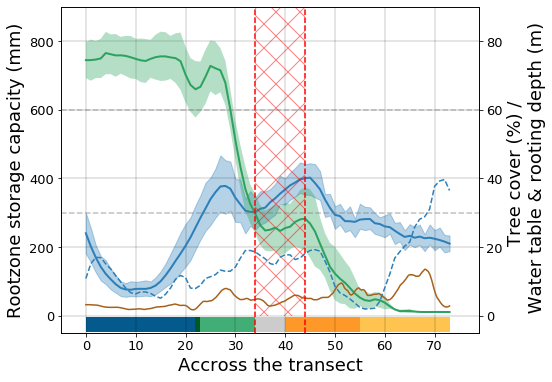

In [131]:
from scipy.signal import savgol_filter

fig, ax1 = plt.subplots(figsize = (7.5,6))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

S_r_yhat = savgol_filter(S_r_geometries_4.mean(axis = 1), 7, 2)
Treecover_yhat = savgol_filter(Treecover_geometries_4[0:12].mean(axis = 0).mean(axis = 1), 7, 2) # window size 501, polynomial order 3
Ground_WT_yhat = savgol_filter(Ground_WT_geometries_4.mean(axis = 1), 7, 2) # window size 501, polynomial order 3
S_r_yhat = numpy_interpolater(S_r_yhat)
Treecover_yhat = numpy_interpolater(Treecover_yhat)
Root_D_yhat = savgol_filter(Root_D_geometries_4.mean(axis = 1), 7, 2)

#ax3.spines["right"].set_position(("axes", 1.06))
#make_patch_spines_invisible(ax3)
# Second, show the right spine.
#ax3.spines["right"].set_visible(True)

p1, = ax1.plot(S_r_yhat, linewidth = 2, label = 'Rootzone Storage capacity (mm)', color = '#2c7fb8')
p2, = ax2.plot(Treecover_yhat, linewidth = 2, label = 'Treecover (%)', color = '#2ca25f')
p3, = ax2.plot(Ground_WT_yhat, linewidth = 1.5, label = 'Ground Water T. Depth (m) {Fan et al. (2013)}', color = '#2c7fb8',
               linestyle = '--', alpha = 1)

p4, = ax2.plot(np.linspace(0,S_r_yhat.shape[0]-1,Root_D_yhat.shape[0]), Root_D_yhat, linewidth = 1.5, 
               label = 'Root Depth (m) {Fan et al. (2017)}', color = '#a6611a')
q1 = ax1.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), S_r_CI_lower_geometries_4.mean(axis = 1), S_r_CI_upper_geometries_4.mean(axis = 1),
                      color = '#2c7fb8', alpha = 0.35)
upperlimit_yhat = ((Treecover_yhat +  (Treecover_geometries_4[0:12].where(Treecover_geometries_4).std(axis = 0).mean(axis = 1))*2))
lowerlimit_yhat = ((Treecover_yhat -  (Treecover_geometries_4[0:12].where(Treecover_geometries_4).std(axis = 0).mean(axis = 1))*2))


q2 = ax2.fill_between(np.linspace(0,S_r_yhat.shape[0]-1,S_r_yhat.shape[0]), upperlimit_yhat, lowerlimit_yhat, facecolor = '#2ca25f', alpha = 0.35)
#ax1.yaxis.label.set_color(p1.get_color())
#ax1.yaxis.label.set_color(p1.get_color())
#ax2.yaxis.label.set_color(p2.get_color())
#ax3.yaxis.label.set_color(p3.get_color())

#Treecover_geometries_1[0].where(S_r_geometries_1.values).mean(axis = 0).plot(ax = ax2, color = 'g')
#Treecover_geometries_1[11].where(S_r_geometries_1.values).mean(axis = 0).plot(ax = ax2, color = 'r')
ax1.set_xlabel('Accross the transect', fontsize = 18)
ax1.tick_params(axis='both', which='major', labelsize=13)
ax2.tick_params(axis='both', which='major', labelsize=13)
ax1.set_ylabel('Rootzone storage capacity (mm)', fontsize = 18)
ax2.set_ylabel('Tree cover (%) / \n Water table & rooting depth (m)', fontsize = 18)
ax1.set_ylim(-50,900)
ax1.set_xlim(-5,S_r_yhat.shape[0]-1+6)

ax2.set_ylim(-5,90)
#ax3.set_ylim(0,85)
lines = [p1, p2, p3]

#adds major gridlines
ax1.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.8)
ax2.axhline(y=60, linestyle='--', color = 'grey', alpha = 0.5)
ax2.axhline(y=30, linestyle='--', color = 'grey', alpha = 0.5)

ax2.axvline(x=44, linestyle='--', color = 'r')
ax2.axvline(x=34, linestyle='--', color = 'r')
plt.fill_between([34,44],[900,900], facecolor="none", hatch="X", edgecolor="r", linewidth=0.0, alpha = 0.5)
ax1.barh(-3, height=-45, align='edge', width=1,  left=np.arange(0, len(Ecozone)), color=color_sel)